# K-Nearest Neighbor
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Nearest Neighbor** algorithm
- play with the hyperparameter K 
- try KNN on **real-world data**, i.e. the CAPTCHA of a website in ZJU

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook


%load_ext autoreload
%autoreload 2

### KNN experiment with hyperparameter K

/Users/Alan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


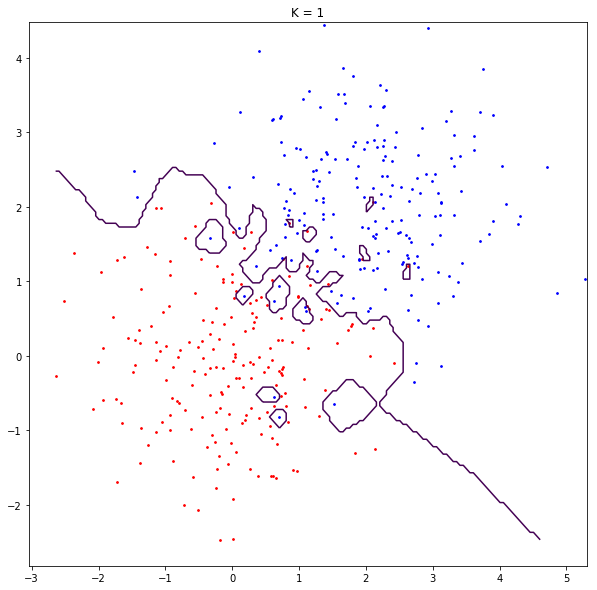

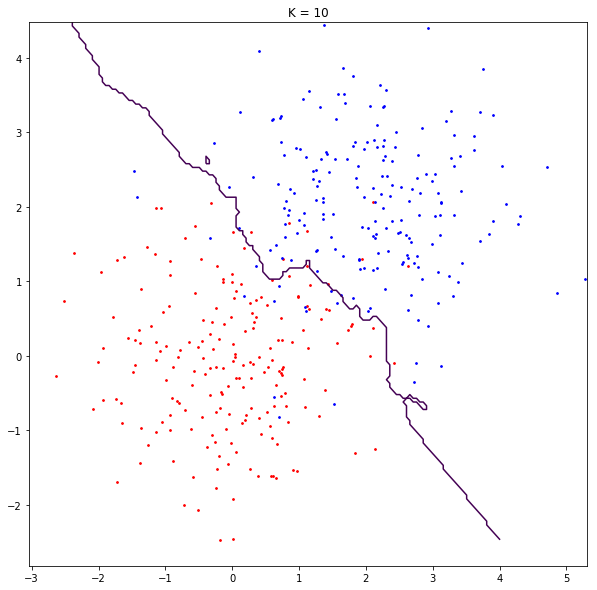

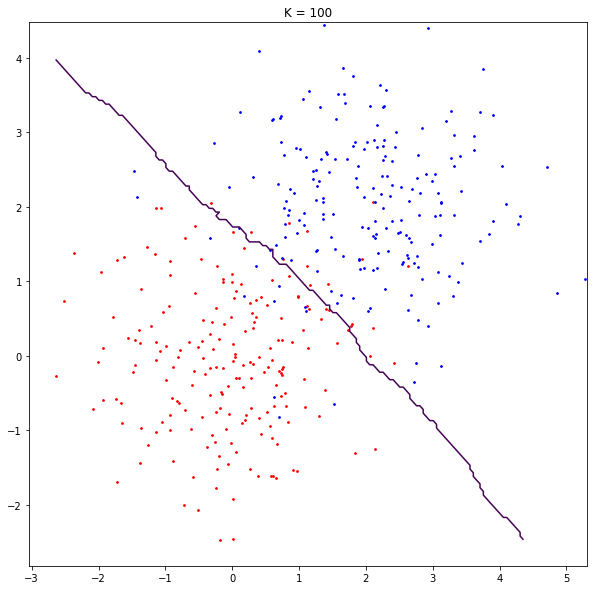

In [3]:
from mkdata import mkdata
from knn_plot import knn_plot

[X, y] = mkdata()

K = [1, 10, 100]
for k in K:
    knn_plot(X, y, k)

### Now Let's hack the website http://cwcx.zju.edu.cn/WFManager/login.jsp

In [41]:
from hack import hack
from extract_image import extract_image
from show_image import show_image

import os
with open("dataset/label.txt", "r") as f:
    content = f.read()
import re
lines = re.split("\n", content, flags = re.S | re.M)
labels = []
for line in lines:
    if line.strip() == "":
        continue
    [a, b, c, d] = line.split(" ")
    labels.extend([int(a), int(b), int(c), int(d)])

x_train = []
for i in range(70, 100):
    x = extract_image(os.path.join("dataset", "captcha" + str(i) + ".jpg"))
    x_train.append(x)
x_train = np.vstack(x_train)
labels = np.array(labels)
print(x_train.shape)
print(labels.shape)
data = {"x_train": x_train, "y_train": labels}
import pickle
with open("data_mat.pkl", "wb") as f:
    pickle.dump(data, f)


(120, 144)
(120,)


array([3., 7., 3., 6.])

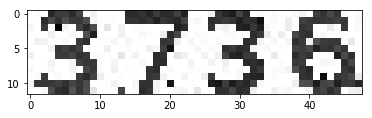

In [43]:
test_img = './test.jpg'  # change it yourself
x = extract_image(test_img)
show_image(x)
hack(test_img)